[ 0.75539762  0.54132471  0.61064686 -0.5540495   0.80361134  0.98566764
 -0.76665253  0.27857998 -0.45986128  0.554499   -0.8631241  -1.15662818
 -0.78926997 -0.60289409  0.71575435 -0.51325849 -0.77442615  0.78498554
 -1.09837971 -0.4798238  -0.64819977  0.52583632  0.85667414  0.95322917
 -0.73097037 -0.58404579 -0.62517613 -0.50942692  0.80043996 -0.91991118]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


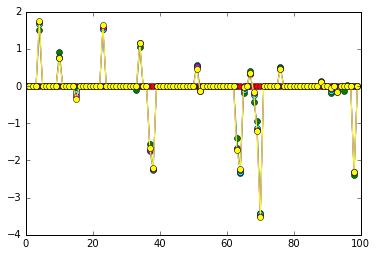

In [24]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

plot.figure()
def sparseSoln(y, A, tau, lam):
    colors = ["blue", "red", "green", "cyan", "magenta", "yellow", "orange"]
    color = 0
    def grad(x):
        return 2 * A.T @ (A @ x - y)
    x_hat = np.zeros(len(A[0]))
    for k in np.arange(0, 100000):
        x_half = x_hat - tau * grad(x_hat)
        x_hat = np.sign(x_half) * np.maximum(np.absolute(x_half) - (1/2 * tau * lam), 0)
        if k % 20000 == 0:
            color += 1
            plot.plot(x_hat, "o-", color=colors[color])
    return x_hat

#x = np.array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]) #len 13
#A = np.random.randn(8, 13)
#y = np.sign(A @ x) # 1 ==> representation, -1 ==> non-representation
#print(y)

#print(np.around(sparseSoln(y, A, .02, .1)))
#[-0. -0.  0.  0.  0.  0.  1.  0. -0.  0.  0.  0.  1.] most of the time correlates some x's correctly, but misses some and
#sometimes correlates incorrectly
#[ 0.  0.  0.  0. -1. -0.  1.  0. -0.  0. -0. -0.  1.]
#[ 0.  0.  1. -0. -0.  0.  0. -0.  0.  0.  0.  0.  1.]
#[-0. -0.  1.  0. -1. -1.  1.  0. -0.  0. -1. -0.  0.]

y = y = np.sign(np.random.randn(30))
A = .1 * np.random.randn(len(y), 100)
x = sparseSoln(y, A, .001, .9)
#print(x)
print(A @ x)
print(np.sign(A @ x) == y) #works for small like .1 times A, but not large, like .5 * A; still something wrong